In [35]:
import pandas as pd                         
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns 
import statistics as st
import json
import warnings
warnings.filterwarnings('ignore')

# Task 1 

In [82]:
df=pd.read_csv("DS1_C8_V3_ND_Sprint2_Data Analysis Using Python_Dataset.csv")
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",04-09-1992,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],26-12-2011,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [84]:
df.shape

(4803, 20)

In [85]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [86]:
df['genres']=df['genres'].apply(json.loads)
df['genre_name']=df['genres'].apply(lambda x:[i['name']for i in x])
df[['genre_name']]

,genre_name
0,"[Action, Adventure, Fantasy, Science Fiction]"
1,"[Adventure, Fantasy, Action]"
2,"[Action, Adventure, Crime]"
3,"[Action, Crime, Drama, Thriller]"
4,"[Action, Adventure, Science Fiction]"
...,...
4798,"[Action, Crime, Thriller]"
4799,"[Comedy, Romance]"
4800,"[Comedy, Drama, Romance, TV Movie]"
4801,[]


In [87]:
df.loc[0:50:, ['title', 'genre_name']]

,title,genre_name
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]"
2,Spectre,"[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]"
4,John Carter,"[Action, Adventure, Science Fiction]"
5,Spider-Man 3,"[Fantasy, Action, Adventure]"
6,Tangled,"[Animation, Family]"
7,Avengers: Age of Ultron,"[Action, Adventure, Science Fiction]"
8,Harry Potter and the Half-Blood Prince,"[Adventure, Fantasy, Family]"
9,Batman v Superman: Dawn of Justice,"[Action, Adventure, Fantasy]"


# Task2

In [88]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
genre_name                 0
dtype: int64

In [89]:
df['homepage'].mode()[0]
df['homepage'].fillna('http://www.missionimpossible.com/',inplace=True)

In [90]:
df['overview'].fillna('NaN',inplace=True)

In [91]:
df['release_date'].mode()[0]
df['release_date'].fillna('01-01-2006',inplace=True)

In [92]:
df['tagline'].mode()[0]
df['tagline'].fillna('Based on a true story.',inplace=True)

In [93]:
df['runtime'].mean()
df['runtime'].fillna('106.87585919600083',inplace=True)

In [94]:
df.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
genre_name              0
dtype: int64

# Task3

In [95]:
t3=df[['genre_name','budget']]
task3=t3[t3['budget']>220000]
task3.sort_values('budget',ascending=False)

,genre_name,budget
17,"[Adventure, Action, Fantasy]",380000000
1,"[Adventure, Fantasy, Action]",300000000
7,"[Action, Adventure, Science Fiction]",280000000
10,"[Adventure, Fantasy, Action, Science Fiction]",270000000
4,"[Action, Adventure, Science Fiction]",260000000
...,...,...
4654,"[Action, Fantasy]",250000
4661,"[Drama, Romance, War]",245000
4664,"[Drama, Action, Crime]",230000
4666,"[Foreign, Documentary]",225000


# Task4 

In [96]:
t4=df[['genre_name','revenue']]
task4=t4[t4['revenue']>961000000]
task4.sort_values('revenue',ascending=False)

,genre_name,revenue
0,"[Action, Adventure, Fantasy, Science Fiction]",2787965087
25,"[Drama, Romance, Thriller]",1845034188
16,"[Science Fiction, Action, Adventure]",1519557910
28,"[Action, Adventure, Science Fiction, Thriller]",1513528810
44,[Action],1506249360
7,"[Action, Adventure, Science Fiction]",1405403694
124,"[Animation, Adventure, Family]",1274219009
31,"[Action, Adventure, Science Fiction]",1215439994
546,"[Family, Animation, Adventure, Comedy]",1156730962
26,"[Adventure, Action, Science Fiction]",1153304495


# Task5 

In [97]:
value=df[(df.budget==0) | (df.revenue==0)]
value

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_name
83,27000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.missionimpossible.com/,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...",...,13-02-2015,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34,"[Action, Adventure, Science Fiction, Romance]"
135,150000000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",http://www.thewolfmanmovie.com/,7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,11-02-2010,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549,"[Drama, Horror, Thriller]"
265,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",http://www.missionimpossible.com/,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...",...,21-11-2003,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366,"[Comedy, Fantasy, Family]"
309,84000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",http://www.missionimpossible.com/,10214,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 2546, ""n...",en,Son of the Mask,"Tim Avery, an aspiring cartoonist, finds himse...",17.815595,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...",...,18-02-2005,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who's next?,Son of the Mask,3.6,338,"[Fantasy, Comedy, Family, Adventure]"
321,0,"[{'id': 35, 'name': 'Comedy'}]",http://www.missionimpossible.com/,77953,"[{""id"": 6078, ""name"": ""politics""}, {""id"": 6083...",en,The Campaign,Two rival politicians compete to win an electi...,16.460356,"[{""name"": ""Everyman Pictures"", ""id"": 2242}, {""...",...,09-08-2012,104907746,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,May The Best Loser Win.,The Campaign,5.6,578,[Comedy]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{'id': 10769, 'name': 'Foreign'}, {'id': 53, ...",http://www.missionimpossible.com/,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],...,12-03-2005,0,80.0,[],Released,Based on a true story.,Cavite,7.5,2,"[Foreign, Thriller]"
4799,9000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.missionimpossible.com/,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,26-12-2011,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[Comedy, Romance]"
4800,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,13-10-2013,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,"Signed, Sealed, Delivered",7.0,6,"[Comedy, Drama, Romance, TV Movie]"
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],...,03-05-2012,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,[]


In [98]:
index_value=value.index
df.drop(index_value,inplace=True)
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_name
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]"
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{'id': 35, 'name': 'Comedy'}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,13-09-1994,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,[Comedy]
4788,12000,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",http://www.missionimpossible.com/,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]",...,12-03-1972,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110,"[Horror, Comedy, Crime]"
4792,20000,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",http://www.missionimpossible.com/,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,"[{""name"": ""Daiei Studios"", ""id"": 881}]",...,06-11-1997,99000,111.0,"[{""i

In [99]:
df1=df[['genre_name','title','revenue','budget']]
df1

,genre_name,title,revenue,budget
0,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,2787965087,237000000
1,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,961000000,300000000
2,"[Action, Adventure, Crime]",Spectre,880674609,245000000
3,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,1084939099,250000000
4,"[Action, Adventure, Science Fiction]",John Carter,284139100,260000000
...,...,...,...,...
4773,[Comedy],Clerks,3151130,27000
4788,"[Horror, Comedy, Crime]",Pink Flamingos,6000000,12000
4792,"[Crime, Horror, Mystery, Thriller]",Cure,99000,20000
4796,"[Science Fiction, Drama, Thriller]",Primer,424760,7000


# Task6

In [107]:
df1.sort_values('budget',ascending=True,inplace=True)
df1_budget= df1[['title', 'budget']]
df1_budget.head(10)

,title,budget
4238,Modern Times,1
3611,A Farewell to Arms,4
3372,Split Second,7
3419,Bran Nue Dae,7
4608,The Prophecy,8
3131,Of Horses and Men,10
3137,Nurse 3-D,10
2933,F.I.S.T.,11
1912,Angela's Ashes,25
1771,The 51st State,28


In [106]:
df1.sort_values('revenue',ascending=False,inplace=True)
df1_rev=df1[['title','revenue']]
df1_rev.head(10)

,title,revenue
0,Avatar,2787965087
25,Titanic,1845034188
16,The Avengers,1519557910
28,Jurassic World,1513528810
44,Furious 7,1506249360
7,Avengers: Age of Ultron,1405403694
124,Frozen,1274219009
31,Iron Man 3,1215439994
546,Minions,1156730962
26,Captain America: Civil War,1153304495


# Task7 

In [102]:
cor=df['popularity'].corr(df['budget'])
cor

0.4319901360079738

<AxesSubplot:>

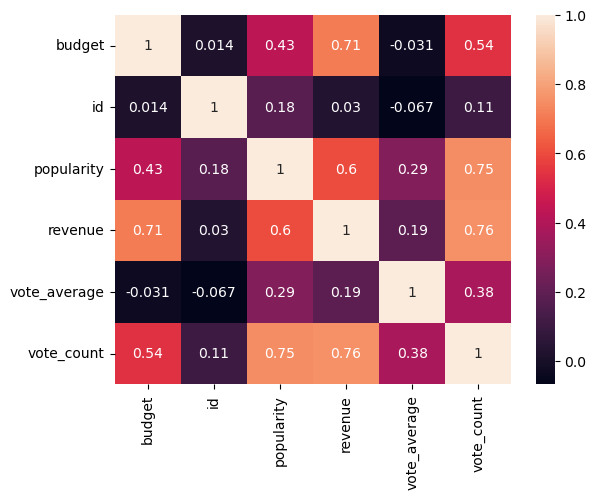

In [120]:
sns.heatmap(df.corr(), annot=True)

# Task8

In [104]:
df['production_companies']=df['production_companies'].apply(json.loads)
df['company_names']=df['production_companies'].apply(lambda x: [i['name'] for i in x])

In [105]:
task8=df['company_names'].explode().value_counts(ascending=False)
task8

Warner Bros.                              280
Universal Pictures                        273
Paramount Pictures                        245
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         167
                                         ... 
HW Two                                      1
Unfinished Films                            1
Infinity Features Entertainment             1
British Columbia Film                       1
Daiei Studios                               1
Name: company_names, Length: 3564, dtype: int64

# Task9

In [121]:
task8.head(25)

Warner Bros.                              280
Universal Pictures                        273
Paramount Pictures                        245
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         167
New Line Cinema                           142
Relativity Media                          100
Walt Disney Pictures                       96
Touchstone Pictures                        93
Metro-Goldwyn-Mayer (MGM)                  92
Columbia Pictures Corporation              86
Village Roadshow Pictures                  73
Miramax Films                              67
DreamWorks SKG                             67
United Artists                             64
Regency Enterprises                        59
Dune Entertainment                         54
TriStar Pictures                           50
Lionsgate                                  49
Canal+                                     48
Summit Entertainment                       48
Fox Searchlight Pictures          

# Task10 

In [188]:
sort_rev=df.sort_values('revenue',ascending=False)

In [192]:
t10=sort_rev.head(500)
t10

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_name,company_names
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo..."
25,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,"[Drama, Romance, Thriller]","[Paramount Pictures, Twentieth Century Fox Fil..."
16,220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,"[Science Fiction, Action, Adventure]","[Paramount Pictures, Marvel Studios]"
28,150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{'name': 'Universal Studios', 'id': 13}, {'na...",...,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege..."
44,190000000,"[{'id': 28, 'name': 'Action'}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176,[Action],"[Universal Pictures, Original Film, Fuji Telev..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,85000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://itscomplicatedmovie.com/,22897,"[{""id"": 3687, ""name"": ""graduation""}, {""id"": 59...",en,It's Complicated,"Ten years after their divorce, Jane and Jake A...",16.479851,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,219103655,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,First comes marriage. Then comes divorce. And ...,It's Complicated,6.2,360,"[Comedy, Romance]","[Universal Pictures, Scott Rudin Productions, ..."
1744,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://knockedupmovie.com/,4964,"[{""id"": 567, ""name"": ""alcohol""}, {""id"": 2864, ...",en,Knocked Up,"For fun loving party animal Ben Stone, the las...",22.527211,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,219076518,129.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Save the due date.,Knocked Up,6.2,1214,"[Comedy, Romance, Drama]","[Universal Pictures, Apatow Productions]"
698,70000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.missionimpossible.com/,9837,"[{""id"": 488, ""name"": ""moses""}, {""id"": 1160, ""n...",en,The Prince of Egypt,Thi

In [167]:
import statistics as st
Mean=[]
Median=[]
Mode=[]

for col in sort_rev:
    if(col=='budget')|(col=='revenue')|(col=='runtime'):
        Median.append(sort_rev[col].median())
        Mean.append(sort_rev[col].mean())
        Mode.append(st.mode(sort_rev[col]))
row_head=['Mean','Median','Mode']
col_name=['budget','revenue','runtime']

data=pd.DataFrame([Mean,Median,Mode],columns=col_name)
data.insert(0,'Measures',row_head)
data

,Measures,budget,revenue,runtime
0,Mean,4.065444e+07,1.212430e+08,110.724373
1,Median,2.500000e+07,5.518472e+07,107.000000
2,Mode,2.000000e+07,8.000000e+06,100.000000


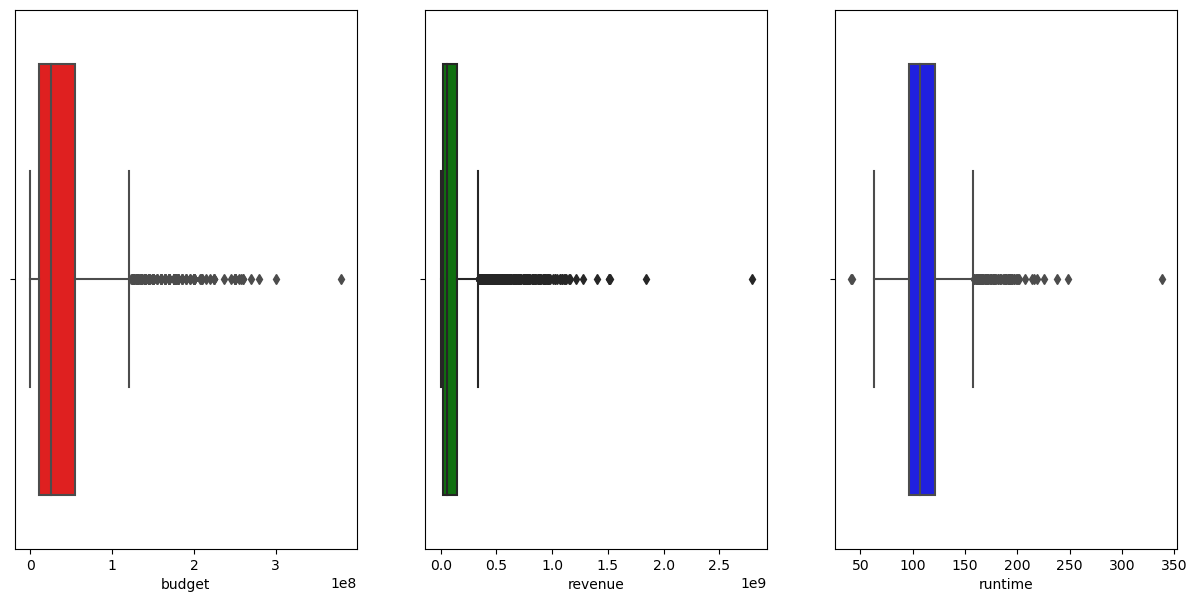

In [168]:
fig, ax = plt.subplots(1, 3, figsize= (15, 7))  
sns.boxplot(x = sort_rev["budget"], ax = ax[0], color = "r")
sns.boxplot(x = sort_rev["revenue"], ax = ax[1], color = "g")
sns.boxplot(x = sort_rev["runtime"], ax = ax[2], color = "b")
plt.show()

In [169]:
mean=int(sort_rev.budget.mean())
print(mean)
x=sort_rev[sort_rev["budget"]>45000000].index
print(x)
for index in x:
    sort_rev.loc[index,'budget']=mean

40654444
Int64Index([   0,   25,   16,   28,   44,    7,  124,   31,  546,   26,
            ...
             871,  311,  998,  863,  490,  543, 1039, 1013, 2638, 1101],
           dtype='int64', length=986)


In [182]:
mean=int(sort_rev.revenue.mean())
print(mean)
x=sort_rev[sort_rev["revenue"]>2.205776e+08].index
print(x)
for index in x:
    sort_rev.loc[index,'revenue']=mean

65623749
Int64Index([1871,  148,  508,  217,  252,  537, 1815,  341,  913, 2975, 1161,
            1121,  937,  446,  912,  825,  930,  419,   70, 1042],
           dtype='int64')


In [183]:
mean=int(sort_rev.runtime.mean())
print(mean)
x=sort_rev[(sort_rev["runtime"]>150)].index
print(x)
y=sort_rev[(sort_rev["runtime"]<60)].index
for index in x:
    sort_rev.loc[index,'runtime']=mean
for index in y:
    sort_rev.loc[index,'runtime']=mean

108
Int64Index([], dtype='int64')


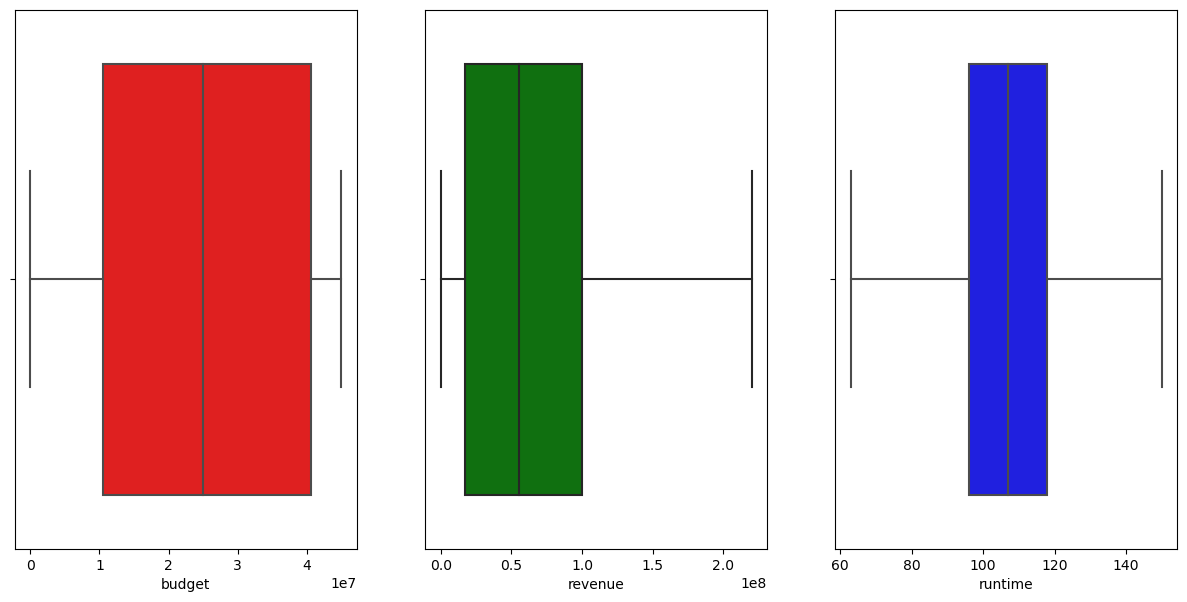

In [184]:
fig, ax = plt.subplots(1, 3, figsize= (15, 7))  
sns.boxplot(x = sort_rev["budget"], ax = ax[0], color = "r")
sns.boxplot(x = sort_rev["revenue"], ax = ax[1], color = "g")
sns.boxplot(x = sort_rev["runtime"], ax = ax[2], color = "b")
plt.show()

# Task11

In [195]:
df2=t10[['title','runtime']]
task11=df2[df2.runtime>=110.724373]
task11

,title,runtime
0,Avatar,162.0
25,Titanic,194.0
16,The Avengers,143.0
28,Jurassic World,124.0
44,Furious 7,137.0
...,...,...
521,The Terminal,128.0
397,It's Complicated,121.0
1744,Knocked Up,129.0
717,Jack Reacher,130.0


In [197]:
task11.sort_values('runtime',ascending=False)

,title,runtime
3813,Gone with the Wind,238.0
329,The Lord of the Rings: The Return of the King,201.0
1818,Schindler's List,195.0
25,Titanic,194.0
690,The Green Mile,189.0
...,...,...
241,Teenage Mutant Ninja Turtles: Out of the Shadows,112.0
126,Thor: The Dark World,112.0
2096,The Conjuring,112.0
71,The Mummy: Tomb of the Dragon Emperor,112.0
